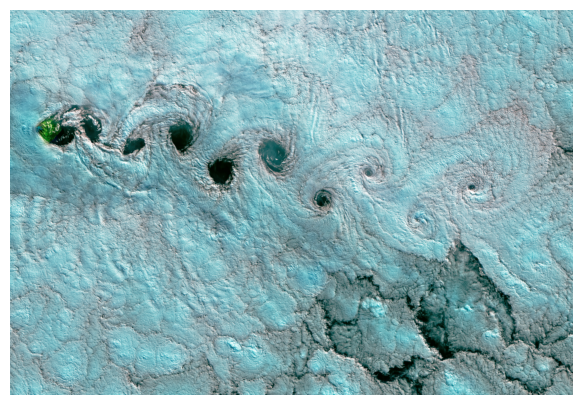

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
image_path = 'Karman_vortex.jpg'
img = imread(image_path)
img_RGB = [np.array(img[:,:,i], dtype = np.float64)/255 for i in range(3)]

def plot_image(RGB, ax = None):
    if ax is None:
        _, ax = plt.subplots(1,1, figsize = (12,5))
        ax.imshow(np.clip(np.stack(RGB, axis = 2),0,1))
        plt.axis('off')
        
plot_image(img_RGB)

In [3]:
damage_fraction = 0.7
np.random.seed(0)
mask_remove = np.random.choice(a=[True, False], size=(img.shape[0],img.shape[1]), \
p=[damage_fraction, 1-damage_fraction])
mask_keep = np.logical_not(mask_remove)
img_damaged_RGB = [img_RGB[i].copy() for i in range(3)]
for i in range(3):
    img_damaged_RGB[i][mask_remove] = np.random.rand(np.sum(mask_remove))

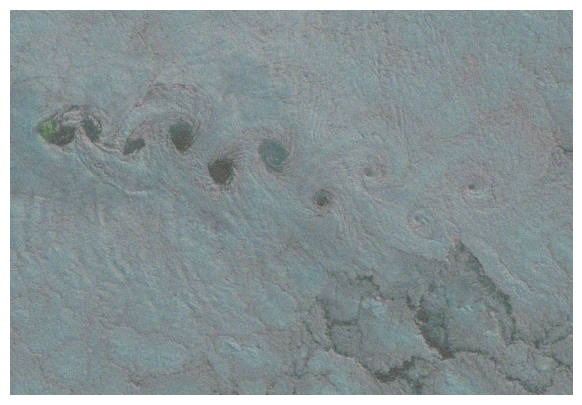

In [4]:
# Display the damaged image
plot_image(img_damaged_RGB)

In [6]:
# 2. Implement the singular value truncation (SVT) algorithm to reconstruct the picture from img damaged RGB.
U_r, S_r, V_r = np.linalg.svd(img_damaged_RGB[0], full_matrices=False)
U_g, S_g, V_g = np.linalg.svd(img_damaged_RGB[1], full_matrices=False)
U_b, S_b, V_b = np.linalg.svd(img_damaged_RGB[2], full_matrices=False)

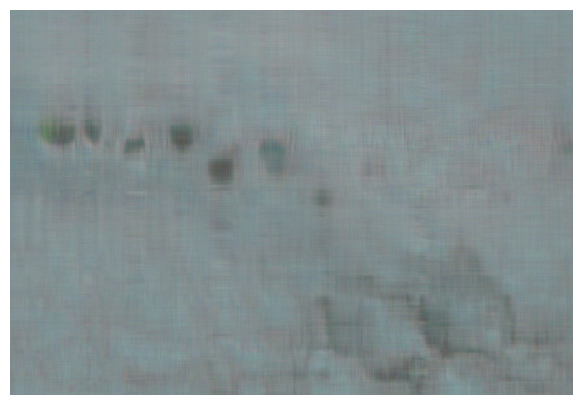

In [9]:
def reconstruct_channel(U, S, V, k):
    return U[:,:k] @ np.diag(S[:k]) @ V[:k,:]

def reconstruct_image(k):
    return [reconstruct_channel(U_r, S_r, V_r, k), \
            reconstruct_channel(U_g, S_g, V_g, k), \
            reconstruct_channel(U_b, S_b, V_b, k)]

    
plot_image(reconstruct_image(30))

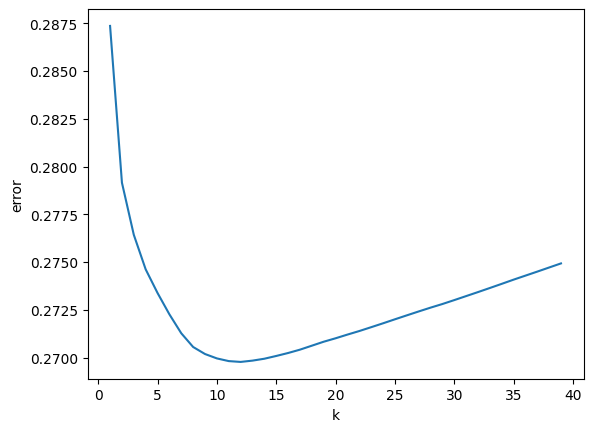

In [26]:
# 3. Plot the error of the reconstruction as a function of k.
def error(k):
    return np.linalg.norm(np.stack(img_RGB, axis = 2) - np.stack(reconstruct_image(k), axis = 2)) / np.linalg.norm(np.stack(img_RGB, axis = 2))

k_values = np.arange(1, 40, 1)
error_values = [error(k) for k in k_values]
plt.plot(k_values, error_values)
plt.xlabel('k')
plt.ylabel('error')
plt.show()

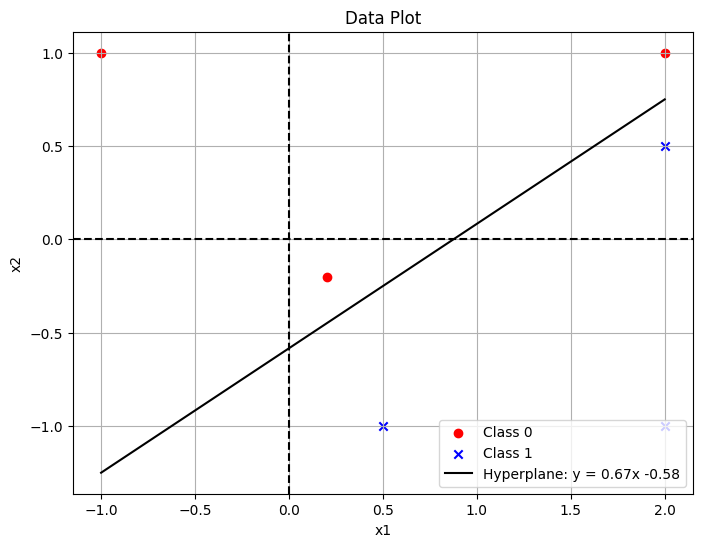

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data points and their labels
data = {
    (2, -1): 1,
    (-1, 1): 0,
    (2, 0.5): 1,
    (0.2, -0.2): 0,
    (0.5, -1): 1,
    (2, 1): 0
}

# Separating data points by their labels
class_0 = np.array([point for point in data if data[point] == 0])
class_1 = np.array([point for point in data if data[point] == 1])

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='x', label='Class 1')

# Add a line that passes through (0.5, -0.25) and (2.0, 0.75), expressed as y = mx + b, label it as 'Hyperplane'
m = (0.75 - (-0.25)) / (2.0 - 0.5)
b = -0.25 - m * 0.5
x = np.linspace(-1, 2, 100)
y = m * x + b
plt.plot(x, y, color='black', label=f'Hyperplane: y = {m:.2f}x {b:.2f}')

# Adding details to the plot
plt.title('Data Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# A perceptron's output for this scenario would be
# w1 * x1 + w2 * x2 + b

# given m = 0.67 and b=-0.33, where x=x1 and y=x2:
# x2 = 0.67 * x1 - 0.33 => w1 = 0.67, w2 = -1, b = -0.33

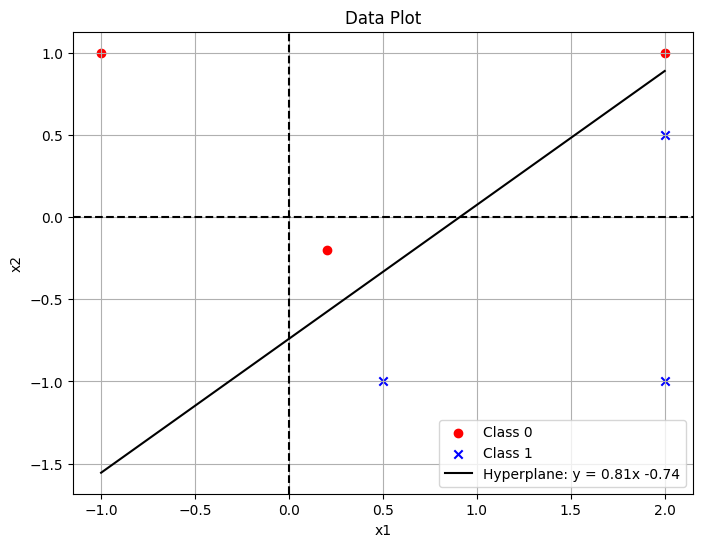

In [40]:
def perceptron_output(x1, x2, params):
    return params[0]*x1 + params[1]*x2 + params[2]

params = [1, 0, 0]
lr = 2

# Implement the perceptron learning algorithm, until convergence with a given tolerance tol.
# The algorithm should return the final parameters of the perceptron.
tol = 0.01
while True:
    params_prev = params.copy()
    for point in data:
        y = data[point]
        x1, x2 = point
        y_hat = 1 if perceptron_output(x1, x2, params) > 0 else 0
        params[0] += lr * (y - y_hat) * x1
        params[1] += lr * (y - y_hat) * x2
        params[2] += lr * (y - y_hat)
    if np.linalg.norm(np.array(params) - np.array(params_prev)) < tol:
        break

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='x', label='Class 1')

# Add a line that passes through (0.5, -0.25) and (2.0, 0.75), expressed as y = mx + b, label it as 'Hyperplane'
m = -params[0] / params[1]
b = -params[2] / params[1]
x = np.linspace(-1, 2, 100)
y = m * x + b
plt.plot(x, y, color='black', label=f'Hyperplane: y = {m:.2f}x {b:.2f}')

# Adding details to the plot
plt.title('Data Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

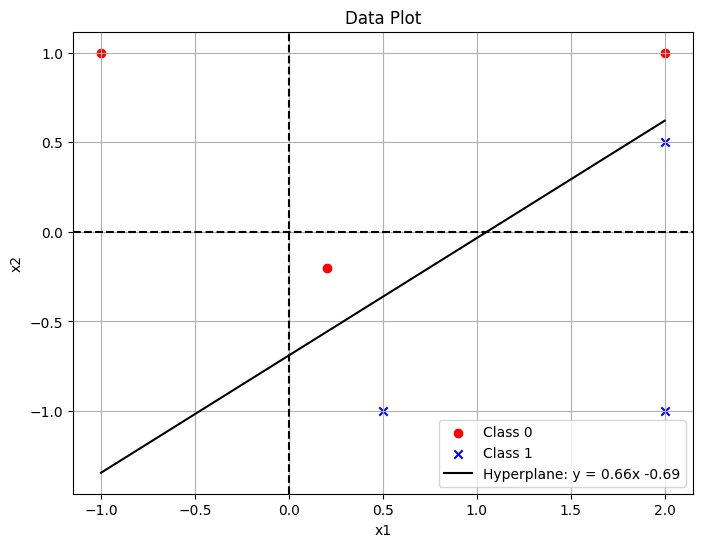

In [41]:
def perceptron_output(x1, x2, params):
    return params[0]*x1 + params[1]*x2 + params[2]

params = [1, 0, 0]
lr = 0.5

# Implement the perceptron learning algorithm, until convergence with a given tolerance tol.
# The algorithm should return the final parameters of the perceptron.
tol = 0.01
while True:
    params_prev = params.copy()
    for point in data:
        y = data[point]
        x1, x2 = point
        y_hat = 1 if perceptron_output(x1, x2, params) > 0 else 0
        params[0] += lr * (y - y_hat) * x1
        params[1] += lr * (y - y_hat) * x2
        params[2] += lr * (y - y_hat)
    if np.linalg.norm(np.array(params) - np.array(params_prev)) < tol:
        break

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], color='red', marker='o', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', marker='x', label='Class 1')

# Add a line that passes through (0.5, -0.25) and (2.0, 0.75), expressed as y = mx + b, label it as 'Hyperplane'
m = -params[0] / params[1]
b = -params[2] / params[1]
x = np.linspace(-1, 2, 100)
y = m * x + b
plt.plot(x, y, color='black', label=f'Hyperplane: y = {m:.2f}x {b:.2f}')

# Adding details to the plot
plt.title('Data Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=0, color='k', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

To show that the output of the softmax function does not change if we shift all components of the activations $ a_j $ by some constant $ c $, let's first consider the softmax function in its general form. The softmax function for a given unit $ k $ in a neural network is defined as:

\begin{equation} \hat{y}_k = \frac{\exp(a_k)}{\sum_{j} \exp(a_j)} \end{equation}

Now, let's shift each activation $ a_j $ by a constant $ c $. The new activation for each unit will be $ a_j + c $. The softmax function for a unit $ k $ after this shift becomes:

\begin{equation} \hat{y}_k' = \frac{\exp(a_k + c)}{\sum_{j} \exp(a_j + c)} \end{equation}

To simplify this, we can use the property of exponentials that states $ \exp(a + b) = \exp(a) \exp(b) $. Applying this to both the numerator and the denominator, we get:

\begin{equation} \hat{y}_k' = \frac{\exp(a_k) \exp(c)}{\sum_{j} \exp(a_j) \exp(c)} \end{equation}

We can see that $ \exp(c) $ is a common factor in both the numerator and the denominator. Since it appears in every term of the sum in the denominator, it can be factored out and then cancelled with the $ \exp(c) $ in the numerator:

\begin{equation} \hat{y}_k' = \frac{\exp(a_k) \cancel{\exp(c)}}{\cancel{\exp(c)} \sum_{j} \exp(a_j)} \end{equation}

After cancelling $ \exp(c) $, we are left with the original softmax function:

\begin{equation} \hat{y}_k' = \frac{\exp(a_k)}{\sum_{j} \exp(a_j)} \end{equation}

Therefore, we have shown that shifting all components of the activations $ a_j $ by some constant $ c $ does not change the output of the softmax function. The output $ \hat{y}_k $ remains the same before and after the shift.

Shifting the activations $ a_j $ in the softmax function by $ c = -\max_j(a_j) $ is a critical technique for enhancing numerical stability, particularly in preventing numerical overflow and underflow. By doing this, the maximum activation is zero, ensuring that the exponential terms in the softmax function remain within a manageable range. This shift prevents excessively large or small values that could lead to computational errors or inefficiencies, making the softmax computation more reliable and efficient in practical machine learning applications. It's a simple yet effective way to handle the rapid growth or diminution of exponential functions without altering the relative proportions between the output probabilities.